In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
raw_data = pd.read_csv('/gdrive/My Drive/ML:Pilot/Assignments/Data/titanic_train.csv')

In [5]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_data.shape

(891, 12)

In [7]:
raw_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
raw_data = raw_data.fillna({"Age":raw_data["Age"].mean(), 'Embarked':'S'})

In [9]:
raw_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
y = raw_data['Survived']
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(891, 1)

In [11]:
x = raw_data.drop(columns=['PassengerId','Survived','Name','Ticket','Fare','Cabin'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [12]:
x.shape, y.shape

((891, 6), (891, 1))

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x['Sex'] = labelencoder.fit_transform(x['Sex'])
x.Embarked.unique()
x['Embarked'] = labelencoder.fit_transform(x['Embarked'])

In [14]:

x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


In [15]:
x.shape, y.shape

((891, 6), (891, 1))

In [16]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, shuffle = False)

In [17]:
x_train.shape, x_test.shape

((668, 6), (223, 6))

In [18]:
y_train.shape, y_test.shape

((668, 1), (223, 1))

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ('newton-cg','liblinear','saga'), 'C':[0.001, 10]}

model = LogisticRegression(penalty = 'l2', n_jobs = -2, max_iter = 6500)

a = GridSearchCV(model, parameters, n_jobs = -2)
a.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=6500, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 10],
                         'solver': ('newton-cg', 'liblinear', 'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
training_score = a.score(x_train, y_train)
y_pred = a.predict(x_train)

In [22]:
y_pred.shape

(668,)

In [23]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [24]:
from sklearn.metrics import classification_report

cr =classification_report(y_train,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       408
           1       0.77      0.67      0.72       260

    accuracy                           0.79       668
   macro avg       0.79      0.77      0.78       668
weighted avg       0.79      0.79      0.79       668



In [25]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_train,y_pred)
print(m)


[[356  52]
 [ 85 175]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Training accuracy score: 0.7949101796407185')

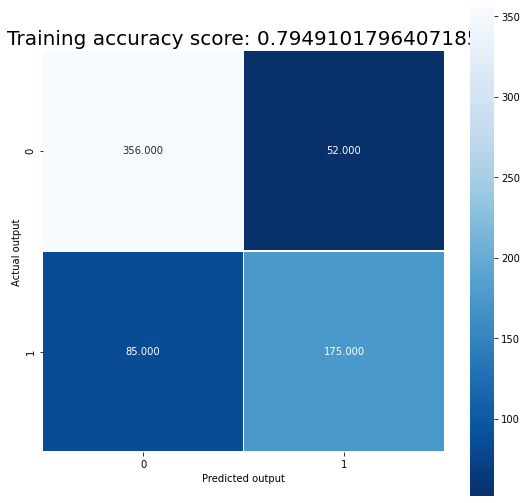

In [26]:
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(m, annot = True, fmt='.3f', linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual output');
plt.xlabel('Predicted output');
sample_title = 'Training accuracy score: {0}'.format(training_score)
plt.title(sample_title, size = 20)

In [27]:
x_test.shape, y_test.shape

((223, 6), (223, 1))

In [28]:
x_pred = a.predict(x_test)

In [29]:
from sklearn.metrics import classification_report

cr =classification_report(y_test,x_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       141
           1       0.80      0.65      0.72        82

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



In [30]:
from sklearn.metrics import confusion_matrix

m1 = confusion_matrix(y_test,x_pred)
print(m1)


[[128  13]
 [ 29  53]]


In [31]:
import math 
erro_r = [np.power((b-a),2) for (a,b) in zip (x_pred, y_test)]
error0 = np.sum(erro_r)
error = math.sqrt(error0)
error = (error/ len(y))*100

print("testing error % = {}".format(error))
accuracy = 100 - error
print("testing accuracy % = {}".format(accuracy))

testing error % = 0.7273558584071672
testing accuracy % = 99.27264414159283


Text(0.5, 1.0, 'Testing accuracy score: 99.27264414159283')

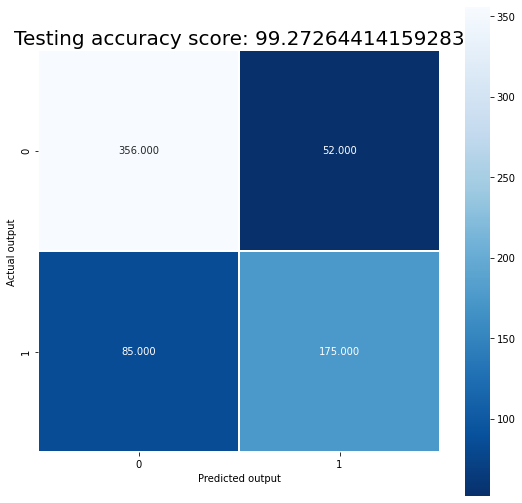

In [32]:
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(m, annot = True, fmt='.3f', linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual output');
plt.xlabel('Predicted output');
sample_title = 'Testing accuracy score: {0}'.format(accuracy)
plt.title(sample_title, size = 20)

In [33]:
import math 
erro_r = [np.power((b-a),2) for (a,b) in zip (y_pred, y_train)]
error0 = np.sum(erro_r)
error = math.sqrt(error0)
error = (error/ len(y))*100

print("training_error % = {}".format(error))
accuracy = 100 - error
print("training_accuracy % = {}".format(accuracy))

training_error % = 1.313658800305233
training_accuracy % = 98.68634119969477


#Titanic test


In [34]:
path = '/gdrive/My Drive/ML:Pilot/Assignments/Data/titanic_test.csv'

In [35]:
raw_data = pd.read_csv(path)
raw_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
raw_data.shape

(418, 11)

In [37]:
raw_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
raw_data = raw_data.fillna({ "Age": raw_data["Age"].mean()})

In [39]:
raw_data.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
x1_raw_data = raw_data.drop(columns=['Cabin','Name','Fare','PassengerId','Ticket'])
x1_raw_data.head()


,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [41]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x1_raw_data['Sex'] = labelencoder.fit_transform(x1_raw_data['Sex'])
x1_raw_data.Embarked.unique()
x1_raw_data['Embarked'] = labelencoder.fit_transform(x1_raw_data['Embarked'])

In [42]:
x1_raw_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [43]:
prediction = a.predict(x1_raw_data)

In [44]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
prediction = pd.DataFrame(prediction)
prediction

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [47]:
df1 = raw_data['PassengerId']

In [49]:
df1

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [51]:
df2 = prediction.join(df1)

In [52]:
df2.head()

,0,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [53]:
df2.to_csv('/gdrive/My Drive/Titanic Survival Prediction.csv')